## Анализ закономерностей определяющих успешность компьютерной игры

### Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».
### Описание данных
* **Name** — название игры
* **Platform** — платформа
* **Year_of_Release** — год выпуска
* **Genre** — жанр игры
* **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
* **EU_sales** — продажи в Европе (миллионы проданных копий)
* **JP_sales** — продажи в Японии (миллионы проданных копий)
* **Other_sales** — продажи в других странах (миллионы проданных копий)
* **Critic_Score** — оценка критиков (максимум 100)
* **User_Score** — оценка пользователей (максимум 10)
* **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## Проект

### Шаг 1. Открыл файл с данными и изучил общую информацию

**Импортирую все необходимые библиотеки:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/datasets/games.csv')
sns.set_style("darkgrid")
display(data.head())
data.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Шаг 2. Подготовил данные

In [3]:
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Привел название столбцов в нижний регистр

In [4]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Для удобства в дальнейшем привел все столбцы в которых есть строковые значения тоже в нижний регистр

In [5]:
for word in data[['name','platform','genre','rating']]:
    data[word] = data[word].str.lower()
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Посмотрел в каких столбцах есть пропуски

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Проверил нету ли дубликатов в данных

In [7]:
data.duplicated().sum()

0

Преобразовал данные в нужные типы

In [8]:
data['year_of_release'] = data['year_of_release'].astype('Int64')
data['year_of_release'].sample(10)

369      2010
16071    2014
7324     2012
793      2005
9215     2002
3262     1998
9209     2000
12270    2008
2640     1982
7284     2002
Name: year_of_release, dtype: Int64

Изменил тип данных столбца года выпуска, т.к. год может быть только целым числом и т.к. в этом столбце есть пропуски использовал Int64.

In [9]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [10]:
data['critic_score'] = data['critic_score'].astype('float64')
data['critic_score'].sample(10)

4056     43.0
15583    68.0
8579      NaN
2818     74.0
3796      NaN
10472     NaN
13889    50.0
13210    74.0
15355    69.0
10992     NaN
Name: critic_score, dtype: float64

Изменил тип данных в столбце оценки критиков, т.к. тут все оценки это целые числа и т.к. в этом столбце есть пропуски использовал Int64.

Поработал с пропусками

In [11]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Наглядная илюстрация среднего количества пропусков в каждом столбце' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

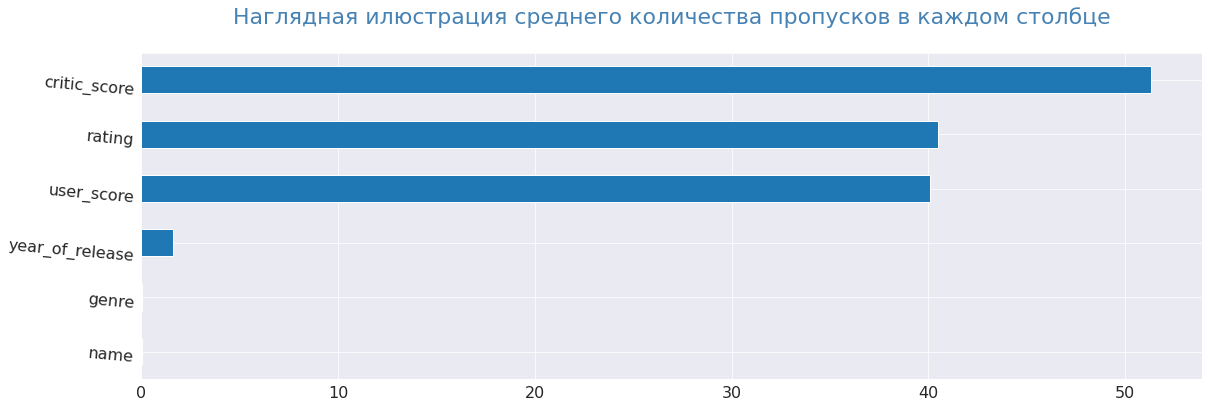

In [12]:
pass_value_barh(data)

In [13]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце с оценкой пользователей заметил аббревиатуру 'tbd', я узнал она означает что данные были нарочно не заполнены, т.к. возможно пользователи просто не определились с рейтингом. Поэтому заменил все значения 'tbd', которые встречаются на NaN.

In [14]:
data.loc[data['user_score'] =='tbd', 'user_score'] = np.nan
data['user_score'] = data['user_score'].astype('float64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


В столбце с названием игры всего лишь 2 пропуска, я решил их просто удалить, т.к. такое маленькое количество пропускоа не как не скажется на общей статистике.

In [15]:
data = data.dropna(subset=['name'])
data['name'].isna().sum()

0

В столбце с годами выпусков игры  269 пропусков, я решил их тоже удалить, т.к. в этом столбце примерно 16500 значений, а эти 269 пропусков составляют примерно 1,8% от всех значений этого столбца, а это будет составлять меньше 5% потерь, значит это не сильно скажется на общей статистике, следовательно можно удалить их.

In [16]:
data = data.dropna(subset=['year_of_release'])
data['year_of_release'].isna().sum()

0

В столбцах с оценкой критиков, оценкой пользователей и рейтингом от организации ESRB количество пропусков составляет почти 50% от всех значений каждого столбца, вследствии чего я решил, что удалить мы не можем и заменить на какие-то значения(средние, медиану или какое-нибудь произвольное обзначение) не логично, т.к. это сильно искозит данные, поэтому я оставил в этих столбцах пропуски, так еще может быть такое, что какие-то игры вышли недавно и их не успели оценить.

In [17]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Шаг 3. Исследовательский анализ данных

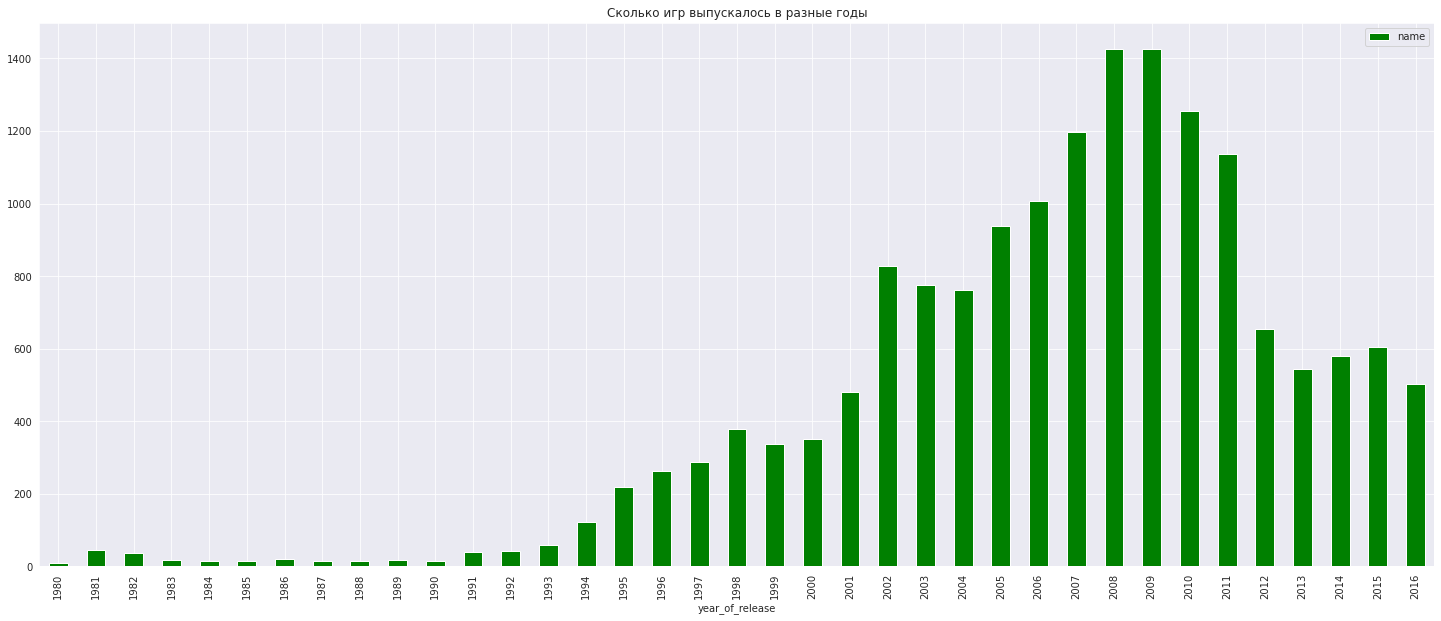

In [18]:
years_groupby = data.groupby('year_of_release').agg({'name':'count'})

years_groupby.plot(y = 'name', kind= 'bar', figsize = (25,10), color = 'g', title='Сколько игр выпускалось в разные годы')
plt.show()

По первому графику видно, что до 1991 года выпускалось единичное количество игр, поэтому эти данные не так сильно важны и я построил следующий график от 1992 года для более наглядного представления

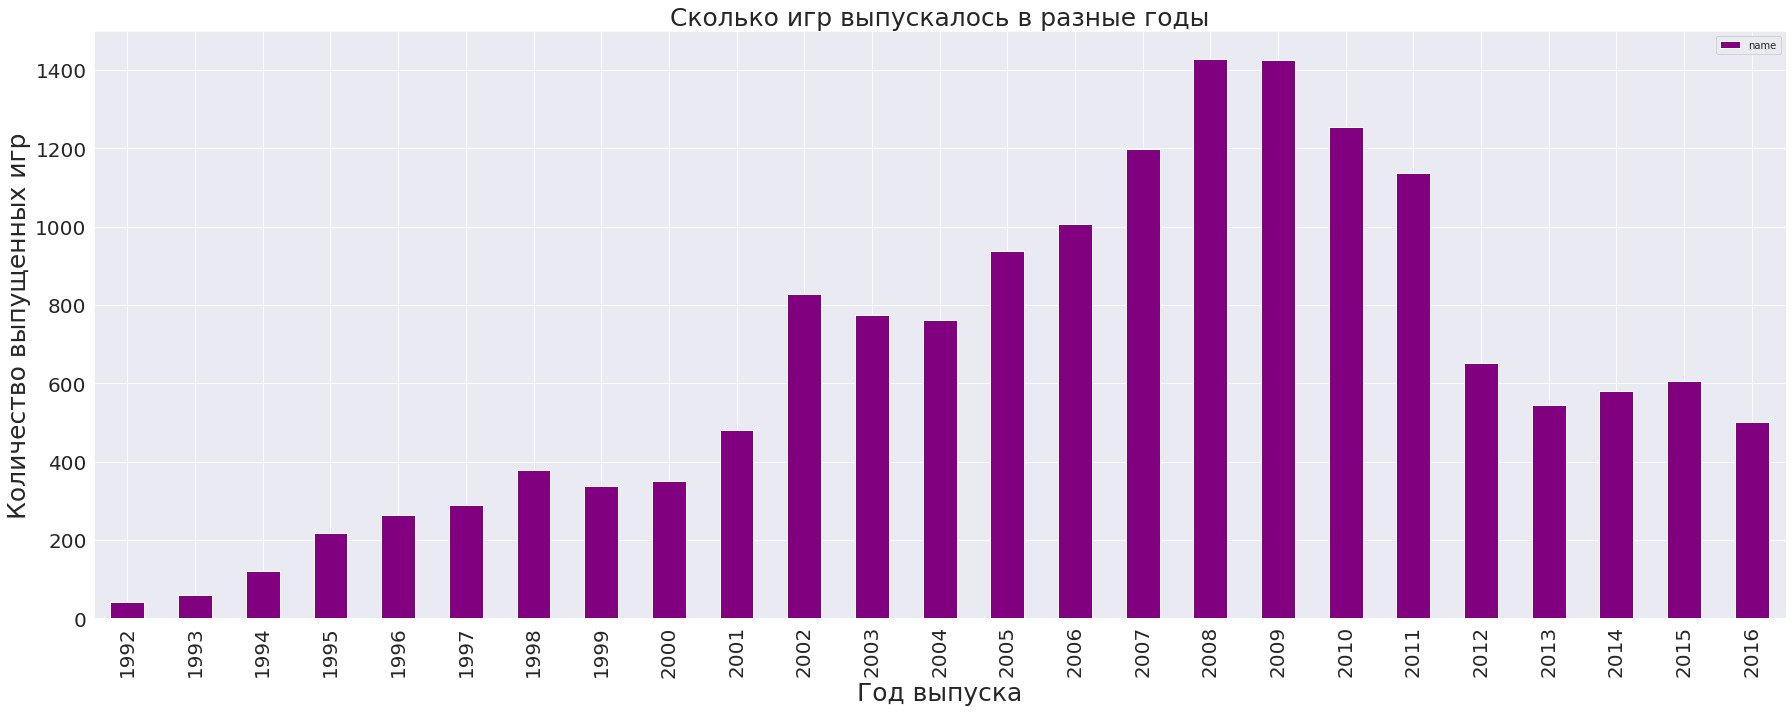

In [19]:
norm_years_groupby = data.groupby('year_of_release').agg({'name':'count'})

norm_years_groupby.loc[1992:].plot(y = 'name', kind= 'bar', figsize = (25,10), color = 'purple', fontsize=20)
plt.title('Сколько игр выпускалось в разные годы', fontsize=25)
plt.xlabel('Год выпуска', fontsize=25)
plt.ylabel('Количество выпущенных игр', fontsize=25)
plt.tight_layout()
plt.show()

Из графика видно, что больше всего игр было выпущено с 2005 до 2011 год. В этот промежуток наблюдался самый активный рост количества создания игр.

,total_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


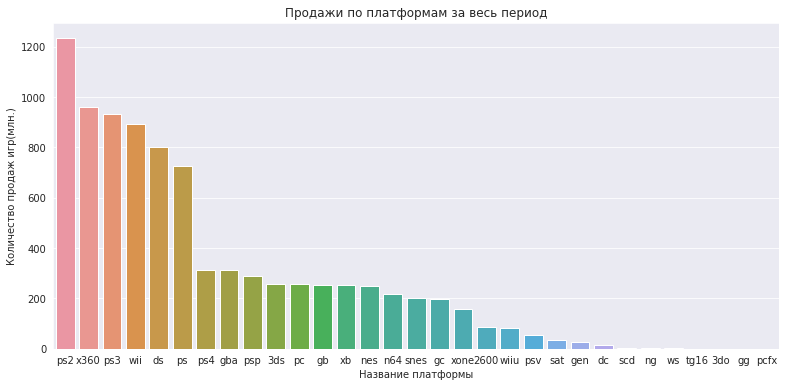

In [20]:
sales_platform = data.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
display(sales_platform)

plt.figure(figsize=(13,6))
sns.barplot(x = sales_platform.index, y = sales_platform['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж игр(млн.)")
plt.show()

Наглядно посмотрел на количество продаж игр на всех платформах и решил, что с наибольшими суммарными продажами будет всего 6 платформ, т.к. разница между ними и всеми остальными платформами почти в 4 раза.

In [21]:
top6_platforms = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', \
    ascending=False).head(6).reset_index()
top6_platforms

,platform,total_sales
0,ps2,1233.56
1,x360,961.24
2,ps3,931.34
3,wii,891.18
4,ds,802.78
5,ps,727.58


Вывел отдельной таблицой топ 6 платформ по продажи игр

In [22]:
top6_platforms['total_sales'].describe()

count       6.000000
mean      924.613333
std       174.136778
min       727.580000
25%       824.880000
50%       911.260000
75%       953.765000
max      1233.560000
Name: total_sales, dtype: float64

По моему мнению актуальный период с 2013 года, т.к. 2-3 года это самое время достижения пика продаж игр.

In [23]:
actual_data = data.query('year_of_release >= 2013') 

Проанализировал актуальные данные по платформам и посмотрел лидеров

In [24]:
top_actual = actual_data.groupby('platform')['total_sales'].agg(sum).sort_values(ascending=False).reset_index()
top_actual

,platform,total_sales
0,ps4,314.14
1,ps3,181.43
2,xone,159.32
3,3ds,143.25
4,x360,136.80
5,wiiu,64.63
6,pc,39.43
7,psv,32.99
8,wii,13.66
9,psp,3.50


Построил распределение по годам топ продаж игр

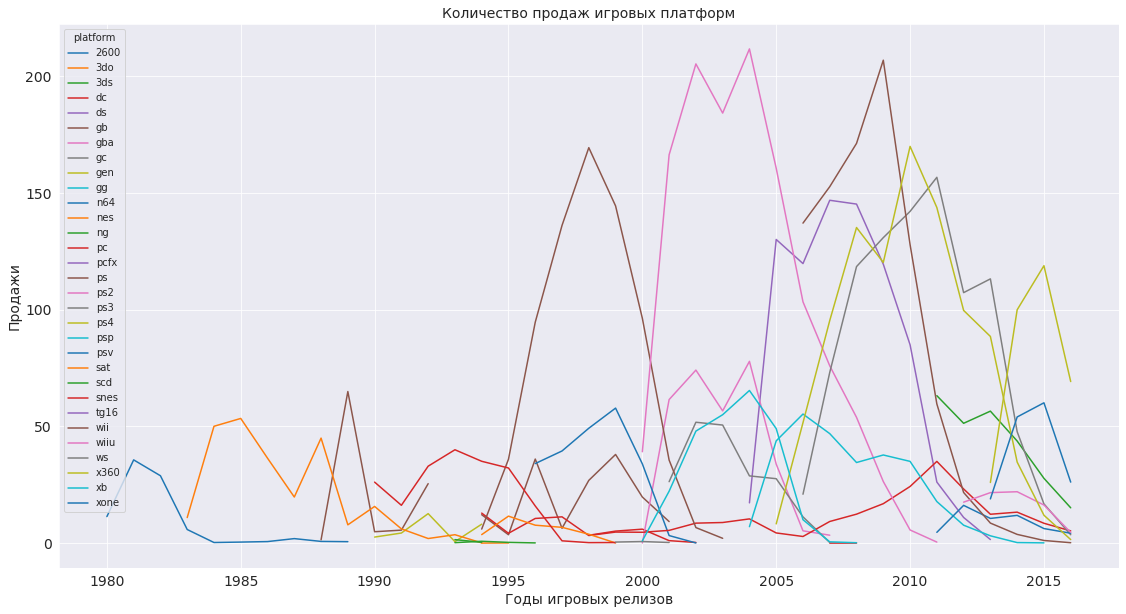

In [25]:
data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') \
    .plot(grid=True, figsize=(19, 10), fontsize=14)
plt.title('Количество продаж игровых платформ', fontsize=14)
plt.xlabel('Годы игровых релизов', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.show()

Примерно все игровые платформы в среднем существуют по 5 - 10 лет. Также в среднем новые платформы пояляются каждый год.

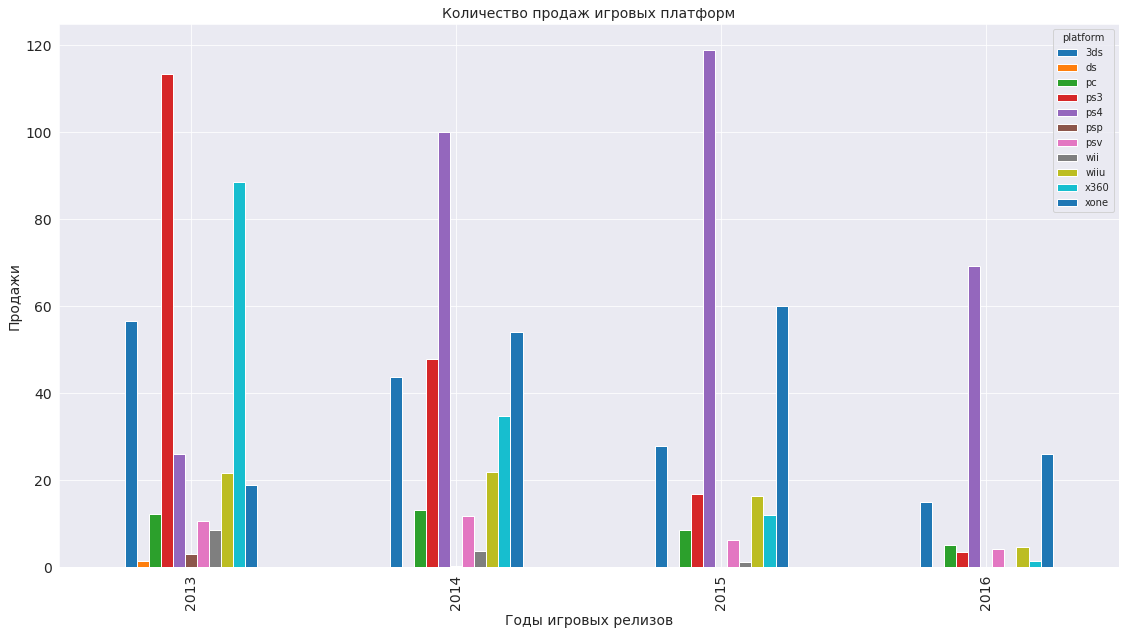

In [26]:
actual_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum') \
    .plot(kind='bar', grid=True, figsize=(19, 10), fontsize=14)
plt.title('Количество продаж игровых платформ', fontsize=14)
plt.xlabel('Годы игровых релизов', fontsize=14)
plt.ylabel('Продажи', fontsize=14)
plt.show()

Вывод по актуальным данным:

Все игры на платформах современем идут на снижение по продажам. Среди них игры для PS4 продаются гораздо чаще, возможно, как можно заметить, что консоль появилась не так давно. Не смотря на это PS4 является потенциально прибыльной, также PC и PCV, потому что показывает хоть небольшие, но стабильные продажи. Падает сильнее всего спрос на консоли: X360, PS3. На остальные консоли уже упал спрос, либо вообще уже не продаются.
Потенциально прибыльные платформы это:
* ~pc~
* 3ds
* ps4
* xone

Построил "ящик с усами" для платформ актуальной выборки

(0.0, 2.0)

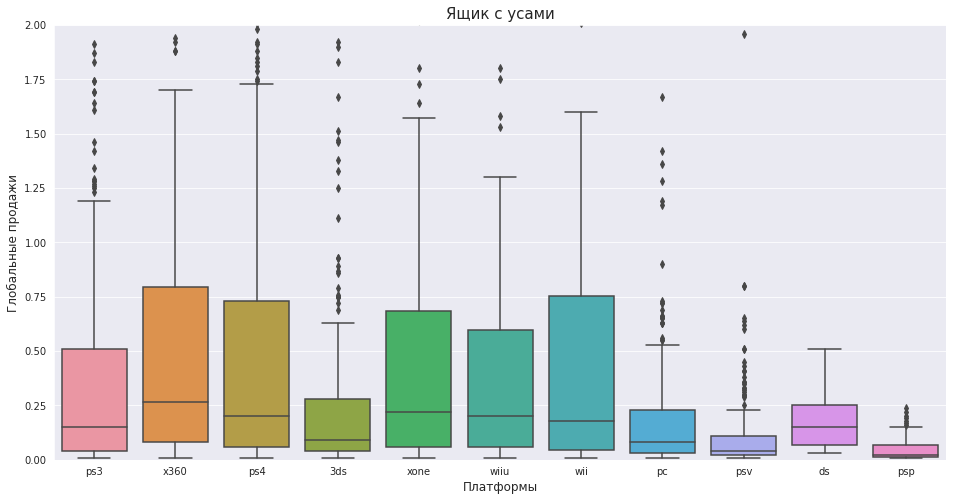

In [27]:
plt.figure(figsize=(16,8))
sns.boxplot(x='platform', y='total_sales', data=actual_data)
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформы', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)
plt.ylim(0, 2)

Исходя из графиков видно, что медиана протекает у каждого ящика по разному.  
Больше всех продаж у x360, затем wii, а после у ps4; psv и psp на последнем месте по продажам.

Так как 2016 год ещё не закончился, то есть много пропусков в данных, которые не желательно коллерировать, поэтому я возьмув одну из популярных консоль, у которой нет данных в 2016. Это будет xone.

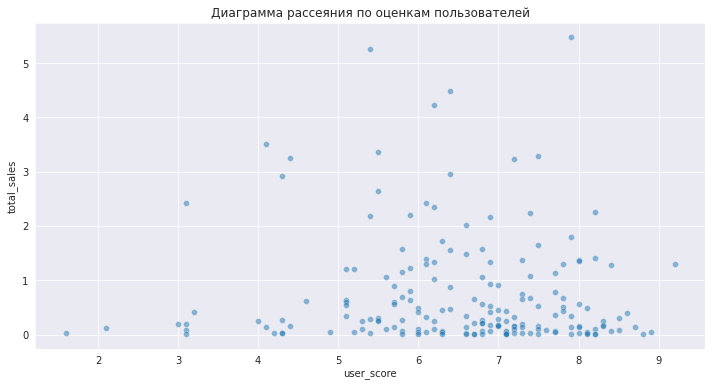

-0.06892505328279414

In [28]:
# Сделал срез данных для платформы xone
xone_data = actual_data[actual_data['platform']=='xone']
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=xone_data, alpha=0.5)
plt.title('Диаграмма рассеяния по оценкам пользователей')
plt.show()
xone_data['user_score'].corr(xone_data['total_sales'])

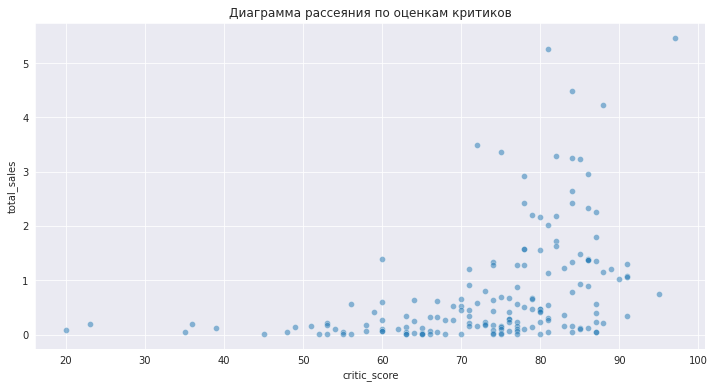

0.4169983280084017

In [29]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=xone_data, alpha=0.5)
plt.title('Диаграмма рассеяния по оценкам критиков')
plt.show()
xone_data['critic_score'].corr(xone_data['total_sales'])

Чтобы сравнить с другими платформами, построил  диаграмму рассеяния и корреляцию для: X360, PS3, WII, DS.

Корреляция по по оценкам пользователей равна: -0.011742185147181342
Корреляция по по оценкам критиков равна: 0.3503445460228664


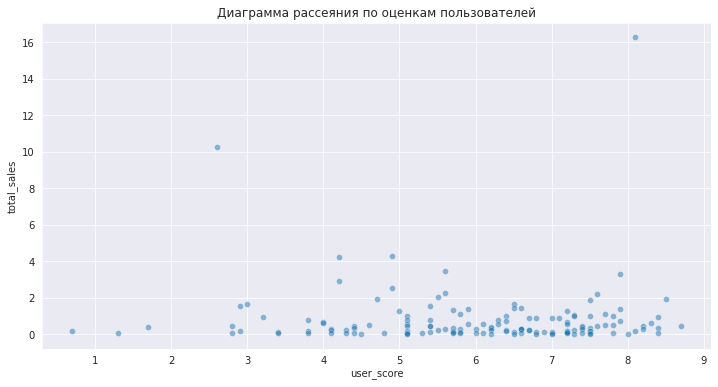

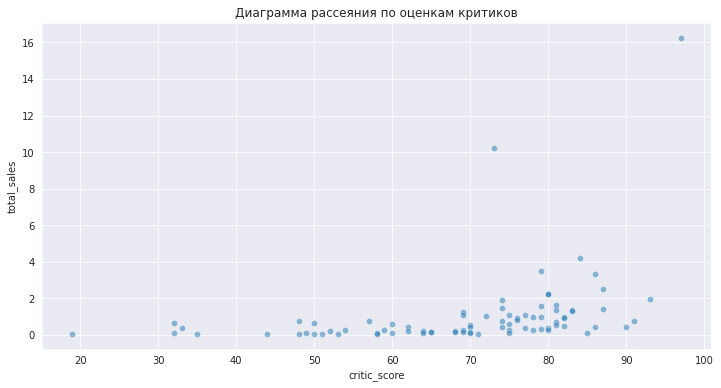

In [30]:
x360_data = actual_data[actual_data['platform']=='x360']
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=x360_data, alpha=0.5)
plt.title('Диаграмма рассеяния по оценкам пользователей')

print('Корреляция по по оценкам пользователей равна:', x360_data['user_score'].corr(x360_data['total_sales']))

plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=x360_data, alpha=0.5)
plt.title('Диаграмма рассеяния по оценкам критиков')

print('Корреляция по по оценкам критиков равна:',  x360_data['critic_score'].corr(x360_data['total_sales']))

plt.show()

Корреляция по по оценкам пользователей равна: 0.0023944027357566925
Корреляция по по оценкам критиков равна: 0.3342853393371919


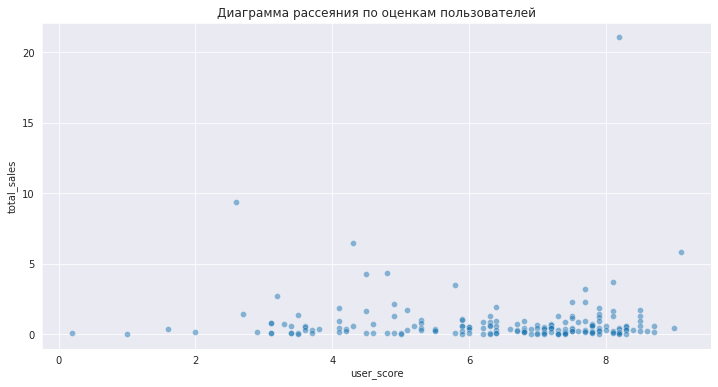

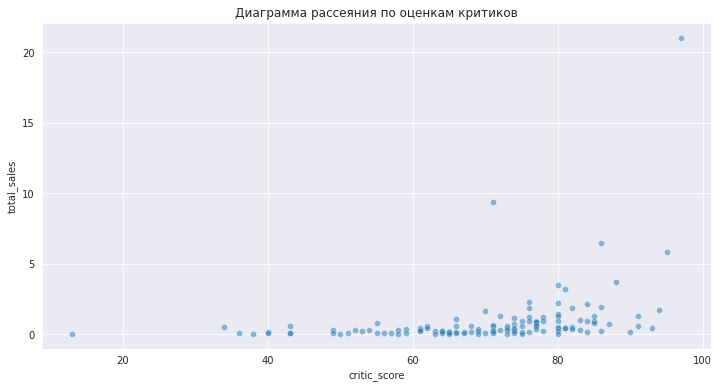

In [31]:
ps3_data = actual_data[actual_data['platform']=='ps3']
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=ps3_data, alpha=0.5)
plt.title('Диаграмма рассеяния по оценкам пользователей')

print('Корреляция по по оценкам пользователей равна:', ps3_data['user_score'].corr(ps3_data['total_sales']))

plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=ps3_data, alpha=0.5)
plt.title('Диаграмма рассеяния по оценкам критиков')

print('Корреляция по по оценкам критиков равна:',  ps3_data['critic_score'].corr(ps3_data['total_sales']))

plt.show()

Корреляция по по оценкам пользователей равна: 0.6829417215362368
Корреляция по по оценкам критиков равна: nan


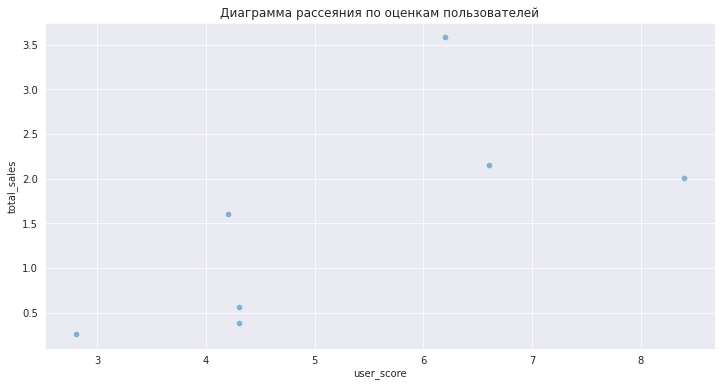

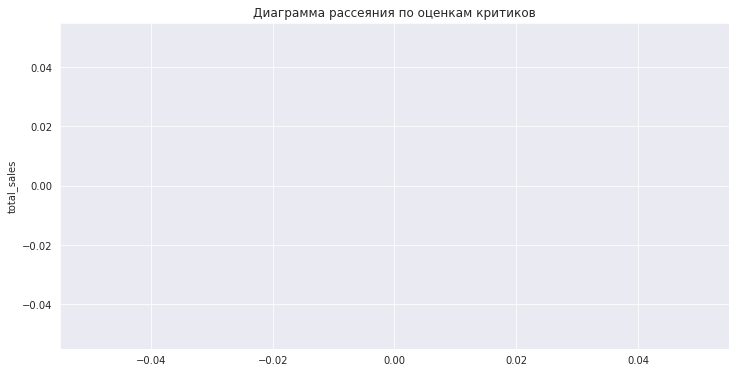

In [32]:
wii_data = actual_data[actual_data['platform']=='wii']
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=wii_data, alpha=0.5)
plt.title('Диаграмма рассеяния по оценкам пользователей')

print('Корреляция по по оценкам пользователей равна:', wii_data['user_score'].corr(wii_data['total_sales']))

plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=wii_data, alpha=0.5)
plt.title('Диаграмма рассеяния по оценкам критиков')

print('Корреляция по по оценкам критиков равна:',  wii_data['critic_score'].corr(wii_data['total_sales']))

plt.show()

Корреляция по по оценкам пользователей равна: nan
Корреляция по по оценкам критиков равна: nan


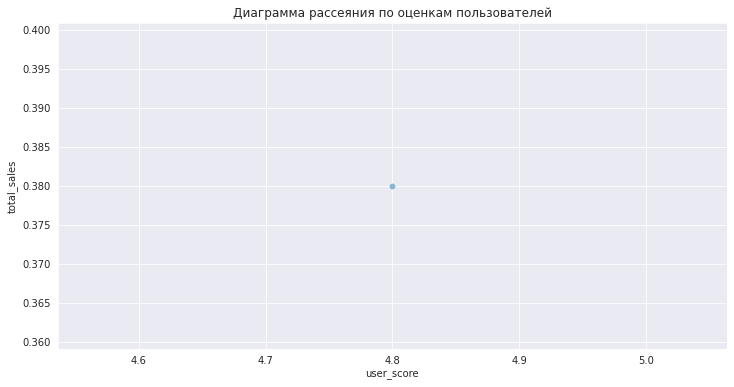

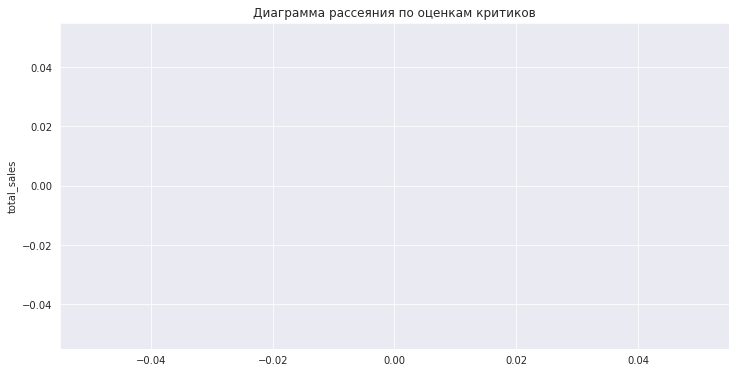

In [33]:
ds_data = actual_data[actual_data['platform']=='ds']
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=ds_data, alpha=0.5)
plt.title('Диаграмма рассеяния по оценкам пользователей')

print('Корреляция по по оценкам пользователей равна:', ds_data['user_score'].corr(ds_data['total_sales']))

plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=ds_data, alpha=0.5)
plt.title('Диаграмма рассеяния по оценкам критиков')

print('Корреляция по по оценкам критиков равна:',  ds_data['critic_score'].corr(ds_data['total_sales']))

plt.show()

Можно сделать вывод, что во всех расмотренных случаях оценка пользователей практически не влияет на продажи, а оценка критиков влияет в какой-то степени на продажи(больше всего она влияют у платформ ps3, х360, xone). Следовательно покупатели прислушиваются больше к критикам чем к оценкам других пользователей.

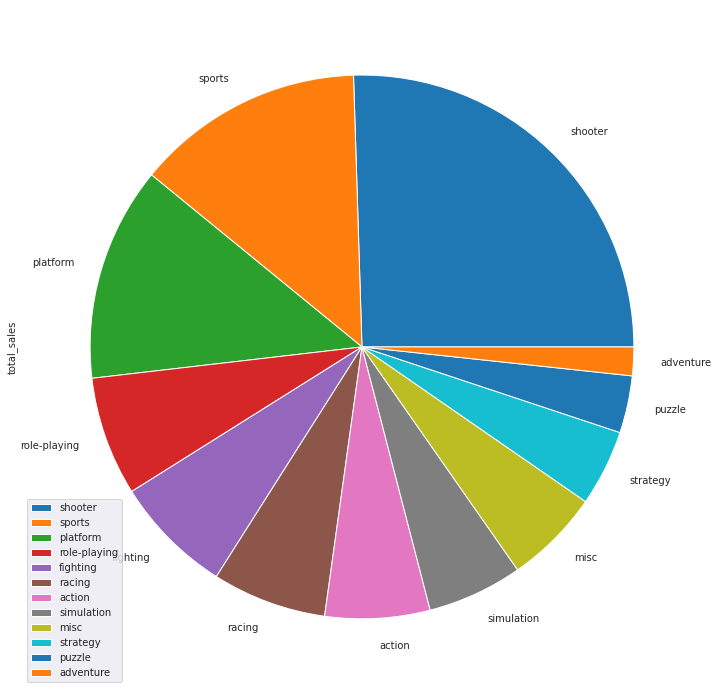

In [34]:
actual_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median').sort_values(ascending=False, \
    by = 'total_sales').plot(kind='pie', figsize=(10,10), y= 'total_sales')
plt.tight_layout()
plt.show()

In [35]:
actual_data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median') \
.sort_values(ascending=False, by = 'total_sales')

,total_sales
genre,
shooter,0.450
sports,0.240
platform,0.225
role-playing,0.125
fighting,0.125
racing,0.120
action,0.110
simulation,0.100
misc,0.100


Самые стабильно прибыльные жанры - platform, shooter, sports.

Наименее стабильно прибыльные жанры - adventure, puzzle.

Посмотрим как в разных регионах продаются игры, для которых значение рейтинга отсутствует.

In [36]:
actual_data['rating'] = actual_data['rating'].fillna('unknown')
#display(actual_data)

sales_unknown = actual_data.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
sales_unknown

# actual_data.pivot_table(index='rating', columns=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum') \
#     .plot(kind='bar', grid=True, figsize=(19, 10), fontsize=14)
#plt.show()

,eu_sales,jp_sales,na_sales
rating,,,
e,83.36,15.14,79.05
e10+,42.69,5.89,54.24
m,145.32,14.11,165.21
t,41.95,20.59,49.79
unknown,78.91,85.05,89.42


Можно заметить, что игры без рейтинга занимают существенное место в каждой стране.

### Шаг 4. Составил портрет пользователя каждого региона

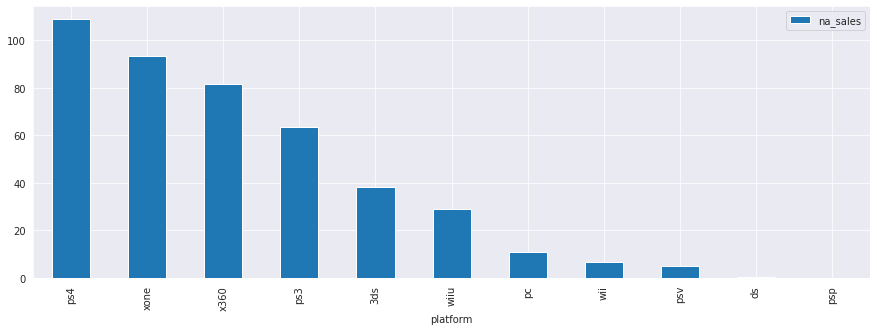

In [37]:
actual_data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum') \
    .sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5))
plt.show()

Пользователи из Северной Америки больше всего предпочитают x360, т.к. я выяснил эту консоль создали в этой стране. Также еще пользуются немалой популярность 3 платформы: wii, ps3, ds.

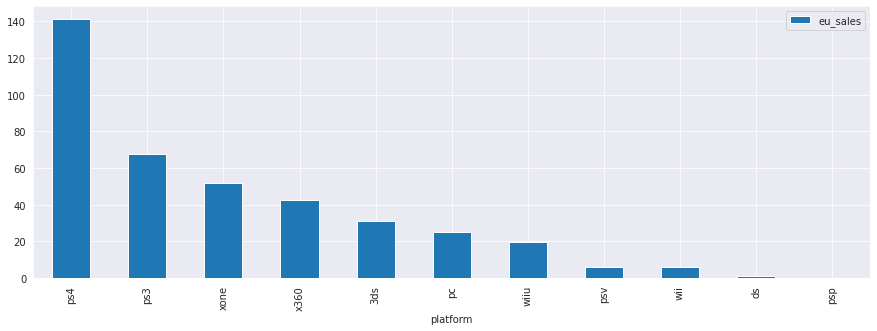

In [38]:
actual_data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum') \
    .sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5))
plt.show()

У пользователей из Европы на первом месте из предпочтений это ps3, но топ 4 платформ в точности такой же как и у пользователей из Северной Америки.

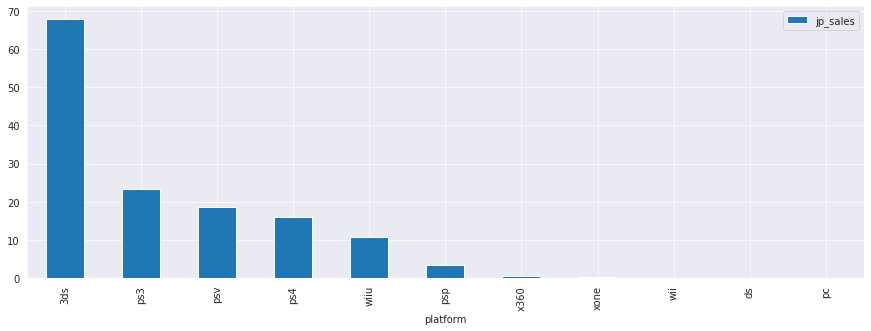

In [39]:
actual_data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum') \
    .sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5))
plt.show()

У пользователей из Японии совсем другие предпочтения платформ, я думаю это связано с тем что большинство платформ японскии, поэтому им хватает своих.

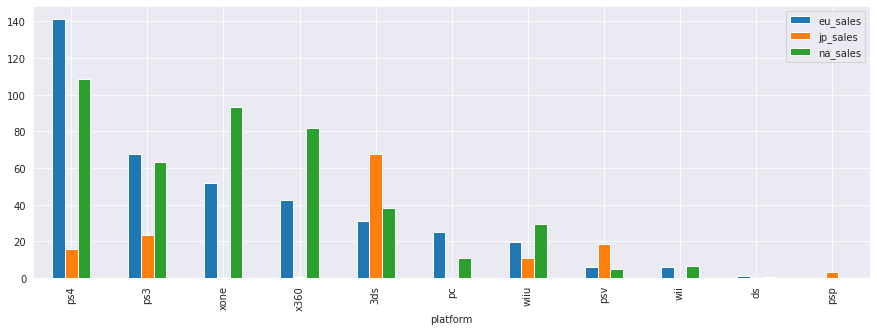

In [40]:
actual_data.pivot_table(index = 'platform', values = ['eu_sales', 'jp_sales', 'na_sales'], aggfunc = 'sum') \
    .sort_values(ascending=False, by = ['eu_sales', 'jp_sales', 'na_sales']).plot(kind = 'bar', figsize=(15,5))
plt.show()

Я могу сделать **общий вывод по трем странам**, что большинство пользователей из каждой страны выбирают платформы своей же страны.

In [41]:
actual_data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum').sort_values(by = 'na_sales', ascending=False)

,na_sales
genre,
action,126.05
shooter,109.74
sports,65.27
role-playing,46.40
misc,27.49
platform,18.14
fighting,15.55
racing,12.96
adventure,7.14


In [42]:
actual_data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum').sort_values(by = 'eu_sales', ascending=False)

,eu_sales
genre,
action,118.13
shooter,87.86
sports,60.52
role-playing,36.97
racing,20.19
misc,20.04
platform,15.58
simulation,10.92
fighting,8.55


In [43]:
actual_data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum').sort_values(by = 'jp_sales', ascending=False)

,jp_sales
genre,
role-playing,51.04
action,40.49
misc,9.20
fighting,7.65
shooter,6.61
adventure,5.82
sports,5.41
platform,4.79
simulation,4.52


**Вывод по жанрам платформ 3 стран:** снова можно заметить, что у пользователей из Европы очень схожи предпочтения с пользователями из Северной Америки, у пользователей из обоих стран топ 3 жанра это: action, sports, shooter. А у пользователей из Японии топ 3 жанра это: role-playing, action, misc.

In [44]:
esrb = actual_data.pivot_table(index = 'rating', values = ['eu_sales','jp_sales','na_sales'], aggfunc = 'sum')
esrb

,eu_sales,jp_sales,na_sales
rating,,,
e,83.36,15.14,79.05
e10+,42.69,5.89,54.24
m,145.32,14.11,165.21
t,41.95,20.59,49.79
unknown,78.91,85.05,89.42


In [45]:
actual_data['total_region'] = actual_data['eu_sales'] + actual_data['jp_sales'] + actual_data['na_sales']
esrb_total = actual_data.pivot_table(index='rating', values='total_region')
esrb_total

,total_region
rating,
e,0.587914
e10+,0.408016
m,0.879783
t,0.337327
unknown,0.259345


По рейтингам Северной Америки видно, что пользователи предпочитают больше всего игры с рейтингом "От 17 лет и старше", на втором месте игры без рейтинга и на третьем месте игры с рейтингом "для всех".

По рейтингам Европы видно, что пользователи предпочитают больше всего игры с рейтингом "От 17 лет и старше", на втором месте игры с рейтингом "для всех" и на третьем месте игры без рейтинга.

По рейтингам Японии видно, что пользователи предпочитают больше всего игры без рейтинга, на втором месте игры с рейтингом "От 13 лет и старше" и на третьем месте игры с рейтингом "для всех".

### Шаг 5. Проверил гипотезы

In [46]:
mean_user_score_xone = data[(data['platform'] == 'xone') & (data['year_of_release'] > 2012)]['user_score']
mean_user_score_pc = data[(data['platform'] == 'pc') & (data['year_of_release'] > 2012)]['user_score']
print(f'Средний пользовательский рейтинг платформы Xbox One: {mean_user_score_xone.mean().round(1)}')
print(f'Средний пользовательский рейтинг платформы PC: {mean_user_score_pc.mean().round(1)}')

Средний пользовательский рейтинг платформы Xbox One: 6.5
Средний пользовательский рейтинг платформы PC: 6.3


**Нулевая и альтернативная гипотеза для рейтингов платформ Xbox One и PC:**

**H0:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**H1:** Средние пользовательские рейтинги платформ Xbox One и PC разные

In [47]:
alpha = 0.05

results = st.ttest_ind(mean_user_score_xone.dropna(), mean_user_score_pc.dropna(), equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


**Вывод: Принимаем нулевую гипотезу.** Средние пользовательские рейтинги платформ Xbox One и PC **одинаковые**.

In [48]:
mean_genre_action = actual_data[(actual_data['genre'] == 'action') & (data['year_of_release'] > 2012)]['user_score']
mean_genre_sports = actual_data[(actual_data['genre'] == 'sports') & (data['year_of_release'] > 2012)]['user_score']
print(f'Средний пользовательский рейтинг жанра Action: {mean_genre_action.mean().round(1)}')
print(f'Средний пользовательский рейтинг жанра Sports: {mean_genre_sports.mean().round(1)}')

Средний пользовательский рейтинг жанра Action: 6.8
Средний пользовательский рейтинг жанра Sports: 5.2


**Нулевая и альтернативная гипотеза для рейтингов жанров Action и Sports:**

**H0:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые

**H1:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

In [49]:
alpha = 0.05

results = st.ttest_ind(mean_genre_action.dropna(), mean_genre_sports.dropna(), equal_var=False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод: Отклоняем нулевую гипотезу в пользу альтернативной.** Средние пользовательские рейтинги жанров Action и Sports **разные**.

Для проверки гипотез я применил **ttest_ind**, потому что мы проверяли гипотезы о равенстве средних двух генеральных совокупностей, методу я передавл массивы, содержащие выборку, также передал параметр **equal_var = False** для того чтобы он считал дисперсии для каждой выборки по отдельности, так как у нас дисперсии выборок разные в обоих случаях.

### Шаг 6. Общий вывод

* Я начал с анализа данных, привел к правильным данным столбцы и нужному типу, привел названия столбцов к нижнему регистру и содержимое некоторых столбцов в которых есть текст.
* В столбце с оценкой пользователей заметил аббревиатуру 'tbd', и я узнал она означает что данные были нарочно не заполнены, т.к. возможно пользователи просто не определились с рейтингом. Поэтому заменил все значения 'tbd', которые встречаются на NaN.
* После проведения анализа стало понятно, что кол-во выпускаемых игр стало резко увеличиваться с 1994-2009 год.
* С 2009 года наблюдается спад из за появления огромного кол-ва альтернативных устройств для игр.
* Проведя анализ оценок пользователей и критиков, можно сделать вывод, что во всех расмотренных случаях оценка пользователей практически не влияет на продажи, а оценка критиков влияет в какой-то степени на продажи(больше всего она влияет у платформ ps3, х360, xone). Следовательно покупатели прислушиваются больше к критикам чем к оценкам других пользователей.
* Самый популярный жанр это action, а самый не популярный оказался puzzle.
* Выводы пользователей по регионам:
    * Пользователи из Северной Америки больше всего предпочитают x360, т.к. я выяснил эту консоль создали в этой стране. Также еще пользуются немалой популярность 3 платформы: wii, ps3, ds. Также они больше всего предпочитают игры с рейтингом "От 17 лет и старше".
    * У пользователей из Европы на первом месте из предпочтений это ps3, но топ 4 платформ в точности такой же как и у пользователей из Северной Америки. Предпочтения по рейтингу такие же как и у Северной Америки.
    * У пользователей из Японии совсем другие предпочтения платформ, я предположил, что это связано с тем что большинство платформ Японскии, поэтому им хватает своих. Больше всего они предпочитают ds, 3ds, ps3. Также они больше всего предпочитают игры без рейтинга.
* Проверил гипотезы и выяснил, что:
    * Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
    * Средние пользовательские рейтинги жанров Action и Sports разные.
* Исходя из всего анализа, можно сделать вывод, что самые продаваемые игры в ближайшие время будут у приставки PS4, так как она вышла совсем недавно, и у предыдущих ее поколений были отличные показатели.